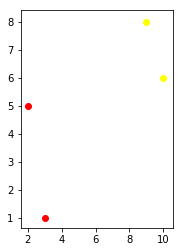

对点[[5 6 8]]的预测结果为：B类


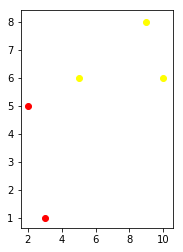

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline


"""

                                        散点图plt.scatter的一些属性：
                                        x：指定散点图的x轴数据；
                                        y：指定散点图的y轴数据；
                                        s：指定散点图点的大小，默认为20，通过传入新的变量，实现气泡图的绘制；
                                        c：可用于不同类别的颜色，指定散点图点的颜色，默认为蓝色；
                                        marker：指定散点图点的形状，默认为圆形；
                                        cmap：指定色图，只有当c参数是一个浮点型的数组的时候才起作用；
                                        alpha：设置散点的透明度；
                                        linewidths：设置散点边界线的宽度；
                                        edgecolors：设置散点边界线的颜色；

"""



"""计算欧氏距离"""
def ComputingEuroDistance(datasets, labels, NewVec):
    row, col = datasets.shape
    NewVec = np.tile(NewVec, (row, 1))
    distance = datasets - NewVec
    sqDistance = distance ** 2
    ResSum = sqDistance.sum(axis = 1)                                           # 求矩阵每一行的和
    Res = np.sqrt(ResSum)
    
    return Res
            
    
"""图像可视化"""
def Plot(datasets, labels, m):
    plt.figure()
    row, col = datasets.shape
    ax = plt.subplot(1,2,m)
    for i in range(row):
        if labels[i] == 'A':
            plt.scatter(datasets[i,0], datasets[i,1], c='red')
        elif labels[i] == 'B':
            plt.scatter(datasets[i,0], datasets[i,1], c='yellow')
    plt.show()
    
    
"""主函数"""
if __name__=='__main__':
    import operator
    datasets = np.array([[2,5,6],[3,1,3],[9,8,6],[10,6,9]])                     # 数据集
    labels = ['A', 'A', 'B', 'B']                                               # 标签集
    k = 3                                                                       # 指定最短的前 3 个
    
    
    
    # 在主函数中完成　KNN　算法
    NewVec = np.array([[5,6,8]])                                                # 待判断的数据点
    distances = ComputingEuroDistance(datasets, labels, NewVec)                 # 计算NewVec到所有其它节点的欧氏距离
    sort = distances.argsort()                                                  # 对距离进行按照从小到大的顺序进行排序
#     print(sort)
    classCount = {}                                                             # 统计前 k 个键值对的数量
    for i in range(k):
        label = labels[sort[i]]
        classCount[label] = classCount.get(label, 0) + 1
#     print(classCount)                                                         # 打印字典
    
    
    # 投票机制  ——————  少数服从多数
    # 对各个分类字典进行分类排序
    Count = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    
    
    # 对原数据可视化数据
    Plot(datasets, labels, 1)
    
    
    # 预测
    print('对点{}的预测结果为：{}类'.format(NewVec, Count[0][0]))
    
    
    # 对新增数据点后进行可视化
    row, col = datasets.shape
    datasets = np.insert(datasets, 4, NewVec, 0)                                # datasets为原矩阵，row为将要插入第几行，NewVec为被插入向量， 0表示插入行，1表示插入列
    labels.append(Count[0][0])
    Plot(datasets, labels, 2)
    
                   